# Bangsgaard and Ottesen (2017) Model Code <a name="top" />

# Table of Contents
1. [Instructions](#instructions)
    1. [Parameter Optimization Against TSST Data Sets](#TSSTInstructions)
    2. [Parameter Optimization Against Basal Data Sets](#basalInstructions)
    3. [Running Without Parameter Optimization](#noOptInstructions)
2. [Imports](#imports)
3. [Parameters and Initial Conditions](#params)
4. [Put Raw Data into Arrays](#rawdata)
    1. [Plot Data Sets](#plotdata)
5. [Model Function--Includes ODE Solver](#modelfunction)
6. [Cost Function Definition](#cost)
7. [Run the Optimization](#run)
8. [Save Output to File](#saveoutput)
9. [Compute Means and Std Devations of Parameters and Output as Table](#paramtable)
10. [Plots](#plots)
11. [No Optimization Run](#no-opt)
12. [No Optimization Run--Iterate Over Multiple CRH Initial Conditions](#multipleCRH)
13. [Run Optimizations for Multiple Patients](#runMultiple)
14. [Dependencies](#dependencies)

# Instructions <a name="instructions"></a>

## Parameter Optimization Against TSST Data Sets <a name="TSSTInstructions" />

**Note:** To quickly run a cell (or a selection of cells), use the shortcut Shift+Enter (or you can also use the button labeled "Run" in the toolbar at the top).

To run simulations with parameter optimization against TSST data, there is no need to change any cells until the heading **Run the Optimization**. Simply run all cells up to the cell below that heading.

In order to set which data set to optimize parameters against, look for the following line of code:
    
    data_to_match = [nelson.ACTH[:,0], nelson.ACTH[:,1], nelson.cortisol[:,0], nelson.cortisol[:,1]]

In order to run against a patient from the TSST data sets, simply change the list entries to reflect the patient number and subject group. The subject groups are:

- nelson.melancholicACTH & nelson.melancholicCortisol (15 patients)
- nelson.atypicalACTH & nelson.atypicalCortisol (14 patients)
- nelson.neitherACTH & nelson.neitherCortisol (14 patients)
- nelson.healthyACTH & nelson.healthyCortisol (15 patients)

You could also run against the mean of all patients cortisol and ACTH concentration values by using `nelson.ACTH[:,1]` and `nelson.cortisol[:,1]`. Or you can run against the mean of any subgroup using `nelson.<subgroup name>Cortisol_mean[:,1]` and `nelson.<subgroup name>ACTH_mean[:,1]` (for instance `nelson.melancholicCortisol_mean[:,1]` & `nelson.melancholicACTH_mean[:,1]`). 

Note that the first column in each data set is the time steps, so indexing with `[:,0]` is referring to the time. These are the values we need to set as the first (ACTH time steps) and third (cortisol time steps) indices of the `data_to_match` list.

The following are several examples of lists you could use for parameter optimization with explanations:

- `nelson.melancholicACTH[:,0], nelson.melancholicACTH[:,1], nelson.melancholicCortisol[:,0], nelson.melancholicCortisol[:,1]`
    - The 1st patient in the Melancholic subgroup
- `nelson.atypicalACTH[:,0], nelson.atypicalACTH[:,14], nelson.atypicalCortisol[:,0], nelson.atypicalCortisol[:,14]`
    - The 14th patient in the Atypical subgroup
- `nelson.healthyACTH[:,0], nelson.healthyACTH[:,2], nelson.healthyCortisol[:,0], nelson.healthyCortisol[:,2]`
    - The 2nd patient in the Healthy Control group
- `nelson.ACTH[:,0], nelson.ACTH[:,1], nelson.cortisol[:,0], nelson.cortisol[:,1]`
    - The mean data set for all patients (depressed and control)
- `nelson.healthyACTH_mean[:,0], nelson.healthyACTH_mean[:,1], nelson.healthyCortisol_mean[:,0], nelson.healthyCortisol_mean[:,1]`
    - The mean of all control patients
    
Next, you need to decide whether you will optimize any initial conditions (ICs). This can be modified in the function `cost_fun(params)`. In the cost function, we use the first two optimized parameters in the list returned by the optimization algorithm to set the IC(s) we want to optimize (CRH in this example):

    y0 = [params[0], y0[1], y0[2]]

We then need to pass only the remaining parameters in the list to the model, along with the updated ICs in y0:

    simData = model(params[1:], y0)
    
If you want to not optimize any ICs, you would simply comment out the two lines above in `cost_fun()`, and uncomment the line:

    #simData = model(params, y0)
    
In that case, you will likely want to change the ICs for CRH and GR, as they will stay the same for every iteration. Under the heading **Run the Optimization**, the following line should be modified to reflect the desired ICs:

    y0 = [0, data_to_match[1][0], data_to_match[3][0]]
    
Be sure to leave the 2nd and 3rd indices unchanged, as these set the ICs to use the initial values of the real-world data set being matched.

At this point, you are ready to run the optimization, so simply run the cells up to the heading **Save Output to File**. This may take some time, so while it is running you can move on to the next steps (if you run a cell while another is processing, it will add it to a queue).

**Note:** You also have the option of using a cost function based on the maximum distance between simulation and real-world data. Simply change SSE_cost to MAX_cost, the instructions for function arguments remain the same.

The cell directly under the heading **Save Output to File** can be changed so that the root filename matches the simulations being run. This root will be used to save all of the various data and figures generated. The current naming scheme would save the files for 5 iterations of parameter optimization against the mean data set from the Nelson with ICs for CRH optimized as:

    filename_root = "bangsgaardModel_output/nelson-patientMean-5-iterations-ICOpt"

This saves the files in a subfolder specific to this model, which helps keep files organized when running multiple models.

The next few cells create an Excel file containing all of the concentration data and optimized parameter values, and text files containing the initial conditions, parameter bounds and parameter means +- standard deviation across the 5 iterations.

The final step after saving the outputs is to plot the simulations against the real-world data. The cell under the heading **Plots** creates an instance of the Visualizer object from the VeVaPy module called visualize. This will start a dialog which asks for several inputs to generate figures as desired.

After initialization of the object, run its method `make_graphs()`, and it will generate figures using the data you have specified. There are a number of arguments that can be optionally specified for this method, and you can see the recommended values for these in the following function call:

    grapher.make_graphs(std_dev = True,
                    sims_line_labels=["Simulated CRH", "Simulated ACTH", "Simulated Cortisol"], 
                    graph_titles = ["CRH Concentration", "ACTH Concentration", "Cortisol Concentration"], 
                    real_data_labels = ["", "Nelson ACTH - Patient Mean", "Nelson Cortisol - Patient Mean"], 
                    xaxis_labels = ["Time (min)", "Time (min)", "Time (min)"], 
                    yaxis_labels = ["CRH (micrograms/dL)", "ACTH (pg/mL)", "Cortisol (micrograms/dL)"],
                    savefile = filename_root+'.png')
    
## Parameter Optimization Against Basal Data Sets <a name="basalInstructions" />

Since these data sets have data points over a 24-hour period (1440 minutes), rather than 140.01 minutes, you will need to change the time interval over which the ODE solver integrates. To do this, go to the cell directly above the heading **Put Raw Data Into Arrays** and uncomment (delete the # at the start of the line) the lines:

    t_start = -0.01
    t_end = 1455.01
    t_step = 0.01

You'll need to comment out the other definitons for these variables (place a # at the start of the line).

The reason you add the extra 15 minutes is that you need to make sure that when you interpolate between your simulated data points the line covers every real-world data point so that you don't cause issues when computing the cost function (and the last data point for the Golier cortisol concentration data sets is at 1455 minutes).

After making this change, you need to again change the `data_to_match` list so that you are matching the basal data set in which you are interested. 

First, choose which data set you wish to match. Here are the options:

- yehuda.controlCortisol
- yehuda.PTSDCortisol
- yehuda.depressedCortisol
- carroll.controlCortisol & carroll.controlACTH
- carroll.LCDepressedCortisol & carroll.LCDepressedACTH (LC = Low Cortisol)
- carroll.HCDepressedCortisol & carroll.HCDepressedACTH (HC = High Cortisol)
- golier.PTSDCortisol & golierPTSDACTH
- golier.nonPTSDTraumaExposedCortisol & golier.nonPTSDTraumaExposedACTH
- golier.nonPTSDNonExposedCortisol & golier.nonPTSDNonExposedACTH
- bremner.abusedPTSDCortisol
- bremner.nonAbusedPTSDCortisol
- bremner.nonAbusedNonPTSDCortisol

**Note:** To see what any of these data sets looks like, click on the **Plot Basal Data Sets** heading in the Table of Contents.

**Note Also:** These data sets all come in smoothed versions (each data point is set to the average of the nearest 5 points of the unsmoothed data). Also, the data sets by Carroll, Golier and Bremner also come in rearranged (or smoothed & rearranged) versions to match the starting time of the Yehuda data (10AM). To use any of these versions, simply append one of the following tags to the end of the data set name (before the indices): `_smooth`, `_rearr`, or `_rearr_smooth`.

First, I will cover what to do with data sets that contain both ACTH and cortisol values, and then afterwards I will cover using the Yehuda and Bremner data sets (which have only cortisol concentration data). Just as with the Nelson data, in all of these data sets the first column is the time step values. This means that if you take any of these arrays and index it with `[:,0]`, you are referring to the time steps. These are the values we need to set as the first (ACTH time steps) and third (cortisol time steps) indices of the `data_to_match` list.

Then for the second and fourth indices, you index the same data sets with `[:,1]` to mean the second column (which contains the mean concentration values for each patient group).

Here are a couple of examples showing arguments you can pass to the cost function:

- `carroll.controlACTH_smooth[:,0], carroll.controlACTH_smooth[:,1], carroll.controlCortisol_smooth[:,0], carroll.controlCortisol_smooth[:,1]`
    - The smoothed Control group mean for the Carroll data set
- `golier.nonPTSDTraumaExposedACTH[:,0], golier.nonPTSDTraumaExposedACTH[:,1], golier.nonPTSDTraumaExposedCortisol[:,0], golier.nonPTSDTraumaExposedCortisol[:,1]`
    - The Trauma-Exposed Control group mean for the Golier data set
    
In order to run simulations against data sets that do not include ACTH concentration data, you will need to change the name of the cost function to `optimize.SSE_cost_noACTH` and then update `data_to_match` to not include the two arguments for ACTH data. To use the Yehuda Control group data, this would look like:

    data_to_match = [yehuda.controlCortisol[:,0], yehuda.controlCortisol[:,1]]
    return optimize.SSE_cost_noACTH(data_to_match[0], data_to_match[1], simData)

At this point, you're ready to run the parameter optimization, so run all of the cells under the heading **Run the Optimization**.

The cell directly under the heading **Save Output to File** should again have the filename changed to something that reflects the data set you're matching now. For instance, the filename root when matching the smoothed Carroll Control group and optimizing ICs would become:

    filename_root = 'bangsgaardModel_output/carroll-control-smooth-5-iterations-ICopt'
            
Finally, the cells under the heading **Plots** should be run again to generate graphs. The same process of giving inputs to the object dialog will be performed and then the method `make_graphs()` should be run with any optional arguments desired.

## Running Without Parameter Optimization <a name="noOptInstructions" />

To run the model with any set of paramaters you desire, without optimization, you can use the cells under the heading **No Optimization Run**. Set the parameters, initial conditions and time interval you want to use by changing the values defined in the section **Parameters and Initial Conditions**. Then you can run the cells under the heading **Plots** as described for simulations with parameter optimization to create graphs.

[Back to Top](#top)

# Imports <a name="imports"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sco
from scipy.interpolate import interp1d
import mpld3
from tabulate import tabulate
import matplotlib
import pandas as pd
from VeVaPy import DEsolver, optimize
from VeVaPy.dataImport import data
from VeVaPy.visualize import Visualizer

[Back to Top](#top)

# Parameters and Initial Conditions <a name="params"></a>

In [2]:
# initial conditions
# order is: CRH, ACTH, Cortisol

y0 = [2,8.725314,1.158798]

In [8]:
# authors' published parameters, from Table A1 & A2 for Control Patient F

a_0 = 3.9031e-4
a_1 = 6.839e12
a_2 = 1.7809e9
a_3 = 2.2803e4
a_4 = 1.7745e5
a_5 = 4.617e-4
mu = 5.83e2
w_1 = 0.0337
w_2 = 0.0205
w_3 = 0.0238
delta = 83.8
alpha = 300
k = 5
beta = 950
l = 6
eps = 0.01
N_c = 0.5217
T = 1440

authors_params = [a_0, a_1, a_2, a_3, a_4, a_5, mu, w_1, w_2, w_3, delta, alpha, k, beta, l, eps, N_c]

In [7]:
# parameters for hypercortisolemic patients
a_0 = 1.31e-1
a_1 = 1.29e13
a_2 = 1.78e9
a_3 = 2.28e4
a_4 = 1.77e5
a_5 = 3.03e-4
mu = 583
w_1 = 4.57e-2
w_2 = 1.46e-2
w_3 = 2.10e-2
delta = 2.01e1
alpha = 300
k = 5.
beta = 950.
l = 6.
eps = 0.01
N_c = 0.5217
T = 1440.


authors_params = [a_0, a_1, a_2, a_3, a_4, a_5, mu, w_1, w_2, w_3, delta, alpha, k, beta, l, eps, N_c]

In [ ]:
par = N_c
plus_minus = par*0.25
print(par - plus_minus, par + plus_minus)

In [74]:
# Bounds for parameter optimization, based on Patient F parameters +- 25%, including all parameters and CRH
# Order is: a_0, a_1, a_2, a_3, a_4, a_5, mu, w_1, w_2, w_3, delta, alpha, k, beta, l, eps, N_c
#bounds = [(0., 20.), [0., 0.15], [6.5e12, 2e13], (1335675000.0, 2226125000.0), (17102.25, 28503.75), (133087.5, 221812.5), [0.0001, 0.0005], (437.25, 728.75), [0., 0.6], [0.02, 0.06], [0.01, 0.03], [10., 1000.], (225., 375.), (3.75, 6.25), (712.5, 1187.5), (4.5, 7.5), (0.0075, 0.0125), (0.391275, 0.652125)]
bounds = ([0., 20.], [0., 0.15], [6.5e12, 2e13], [1335675000.0, 2226125000.0], [17102.25, 28503.75], [133087.5, 221812.5], [0.0001, 0.0005], [437.25, 728.75], [0., 0.6], [0.02, 0.06], [0.01, 0.03], [10., 1000.], [225., 375.], [3.75, 6.25], [712.5, 1187.5], [4.5, 7.5], [0.0075, 0.0125], [0.391275, 0.652125])


In [62]:
# Bounds for only the parameters that change between populations in the publication, plus CRH
# Order is: CRH, a_0, a_1, a_5, w_1, w_2, w_3, delta
bounds = ([0., 20.],[0., 0.15], [6.5e12, 2e13], [0.0001, 0.0005], [0., 0.6], [0.02, 0.06], [0.01, 0.03], [10., 1000.])

In [68]:
# define time interval for integration

# time interval and step definition
# all data sets end on 1440.0 or earlier except the Golier cortisol sets,
# they end on 1455.0, so I should set t_end = 1455.01 when matching them
t_start = -0.01
t_end = 1455.01
t_step = 0.01

# time interval and step definition for integration
#t_start = -0.01
#t_end = 140.01
#t_step = 0.01

[Back to Top](#top)

# Put Raw Data Into Arrays <a name="rawdata"></a>

In [11]:
# Create an instance of the data class for each data set contained in the HPAmodeling library, and set the time
# scale to hours.
yehuda = data("yehuda", "minutes")
carroll = data("carroll", "minutes")
golier = data("golier", "minutes")
bremner = data("bremner", "minutes")
nelson = data("nelson", "minutes")
patientF = data("patientF", "minutes")

## Plot Data Sets <a name="plotdata"></a>

In [ ]:
# plot the smoothed data to check it against the figures in the paper
#mpld3.enable_notebook()
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(10,7))

ax1.plot(patientF.ACTH[:,0], patientF.ACTH[:,1])
ax1.plot(patientF.ACTH_smooth[:,0], patientF.ACTH_smooth[:,1], color = "orange")
ax1.set(xlabel="Time (minutes)", ylabel="ACTH (pg/mL)")

ax2.plot(patientF.cortisol[:,0], patientF.cortisol[:,1])
ax2.plot(patientF.cortisol_smooth[:,0], patientF.cortisol_smooth[:,1], color = "orange")
ax2.set(xlabel="Time (minutes)", ylabel="Cortisol (micrograms/dL)")

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (15,15))

ax1.plot(yehuda.controlCortisol[:,0], yehuda.controlCortisol[:,1], label = "Control Group Cortisol")
ax1.plot(yehuda.controlCortisol_smooth[:,0], yehuda.controlCortisol_smooth[:,1], label = "Control Group Cortisol - Smoothed")
ax1.set(xlabel="Time (minutes)", ylabel="Cortisol (micrograms/dL)")
ax1.legend(loc="lower right", shadow = True, fancybox = True)

ax2.plot(yehuda.PTSDCortisol[:,0], yehuda.PTSDCortisol[:,1], label = "PTSD Group Cortisol")
ax2.plot(yehuda.PTSDCortisol_smooth[:,0], yehuda.PTSDCortisol_smooth[:,1], label = "PTSD Group Cortisol - Smoothed")
ax2.set(xlabel="Time (minutes)", ylabel="Cortisol (micrograms/dL)")
ax2.legend(loc="lower right", shadow = True, fancybox = True)

ax3.plot(yehuda.depressedCortisol[:,0], yehuda.depressedCortisol[:,1], label = "Depression Group Cortisol")
ax3.plot(yehuda.depressedCortisol_smooth[:,0], yehuda.depressedCortisol_smooth[:,1], label = "Depression Group Cortisol - Smoothed")
ax3.set(xlabel="Time (minutes)", ylabel="Cortisol (micrograms/dL)")
ax3.legend(loc="lower right", shadow = True, fancybox = True)


In [ ]:
#mpld3.enable_notebook()
%matplotlib inline

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, figsize = (15,15))

ax1.plot(carroll.controlCortisol_rearr[:,0], carroll.controlCortisol_rearr[:,1], 'b', label = "Control")
ax1.plot(carroll.HCDepressedCortisol_rearr[:,0], carroll.HCDepressedCortisol_rearr[:,1], 'r', label = "High Cortisol Depressed")
ax1.plot(carroll.controlCortisol_rearr_smooth[:,0], carroll.controlCortisol_rearr_smooth[:,1], label = "Control - Smoothed")
ax1.plot(carroll.HCDepressedCortisol_rearr_smooth[:,0], carroll.HCDepressedCortisol_rearr_smooth[:,1], label = "High Cortisol Depressed - Smoothed")
ax1.set(xlabel="Time (minutes)", ylabel="Cortisol (micrograms/dL)")
ax1.legend(loc="upper right", shadow = True, fancybox = True)

ax2.plot(carroll.controlCortisol_rearr[:,0], carroll.controlCortisol_rearr[:,1], 'b', label = "Control")
ax2.plot(carroll.LCDepressedCortisol_rearr[:,0], carroll.LCDepressedCortisol_rearr[:,1], 'g', label = "Low Cortisol Depressed")
ax2.plot(carroll.controlCortisol_rearr_smooth[:,0], carroll.controlCortisol_rearr_smooth[:,1], label = "Control - Smoothed")
ax2.plot(carroll.LCDepressedCortisol_rearr_smooth[:,0], carroll.LCDepressedCortisol_rearr_smooth[:,1], label = "Low Cortisol Depressed - Smoothed")
ax2.set(xlabel="Time (minutes)", ylabel="Cortisol (micrograms/dL)")
ax2.legend(loc="upper right", shadow = True, fancybox = True)

ax3.plot(carroll.controlACTH_rearr[:,0], carroll.controlACTH_rearr[:,1], 'b', label = "Control")
ax3.plot(carroll.HCDepressedACTH_rearr[:,0], carroll.HCDepressedACTH_rearr[:,1], 'r', label = "High Cortisol Depressed")
ax3.plot(carroll.controlACTH_rearr_smooth[:,0], carroll.controlACTH_rearr_smooth[:,1], label = "Control - Smoothed")
ax3.plot(carroll.HCDepressedACTH_rearr_smooth[:,0], carroll.HCDepressedACTH_rearr_smooth[:,1], label = "High Cortisol Depressed - Smoothed")
ax3.set(xlabel="Time (minutes)", ylabel="ACTH (pg/mL)")
ax3.legend(loc="upper right", shadow = True, fancybox = True)

ax4.plot(carroll.controlACTH_rearr[:,0], carroll.controlACTH_rearr[:,1], 'b', label = "Control")
ax4.plot(carroll.LCDepressedACTH_rearr[:,0], carroll.LCDepressedACTH_rearr[:,1], 'g', label = "Low Cortisol Depressed")
ax4.plot(carroll.controlACTH_rearr_smooth[:,0], carroll.controlACTH_rearr_smooth[:,1], label = "Control - Smoothed")
ax4.plot(carroll.LCDepressedACTH_rearr_smooth[:,0], carroll.LCDepressedACTH_rearr_smooth[:,1], label = "Low Cortisol Depressed - Smoothed")
ax4.set(xlabel="Time (minutes)", ylabel="ACTH (pg/mL)")
ax4.legend(loc="upper right", shadow = True, fancybox = True)

In [ ]:
%matplotlib inline

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 6, figsize = (15,20))

ax1.plot(golier.PTSDCortisol_rearr_smooth[:,0], golier.PTSDCortisol_rearr_smooth[:,1], label = "Trauma Exposed PTSD Cortisol - Smoothed")
ax1.plot(golier.PTSDCortisol_rearr[:,0], golier.PTSDCortisol_rearr[:,1], label = "Trauma Exposed PTSD Cortisol")
ax1.set(xlabel="Time (minutes)", ylabel="Cortisol (mg/dL)")
ax1.legend(loc="lower right", shadow = True, fancybox = True)

ax2.plot(golier.nonPTSDTraumaExposedCortisol_rearr_smooth[:,0], golier.nonPTSDTraumaExposedCortisol_rearr_smooth[:,1], label = "Trauma Exposed Non-PTSD Cortisol - Smoothed")
ax2.plot(golier.nonPTSDTraumaExposedCortisol_rearr[:,0], golier.nonPTSDTraumaExposedCortisol_rearr[:,1], label = "Trauma Exposed Non-PTSD Cortisol")
ax2.set(xlabel="Time (minutes)", ylabel="Cortisol (mg/dL)")
ax2.legend(loc="lower right", shadow = True, fancybox = True)

ax3.plot(golier.nonPTSDNonExposedCortisol_rearr_smooth[:,0], golier.nonPTSDNonExposedCortisol_rearr_smooth[:,1], label = "Non-Exposed Non-PTSD Cortisol - Smoothed")
ax3.plot(golier.nonPTSDNonExposedCortisol_rearr[:,0], golier.nonPTSDNonExposedCortisol_rearr[:,1], label = "Non-Exposed Non-PTSD Cortisol")
ax3.set(xlabel="Time (minutes)", ylabel="Cortisol (mg/dL)")
ax3.legend(loc="lower right", shadow = True, fancybox = True)

ax4.plot(golier.PTSDACTH_rearr_smooth[:,0], golier.PTSDACTH_rearr_smooth[:,1], label = "Trauma Exposed PTSD ACTH - Smoothed")
ax4.plot(golier.PTSDACTH_rearr[:,0], golier.PTSDACTH_rearr[:,1], label = "Trauma Exposed PTSD ACTH")
ax4.set(xlabel="Time (minutes)", ylabel="ACTH (pg/mL)")
ax4.legend(loc="lower right", shadow = True, fancybox = True)

ax5.plot(golier.nonPTSDTraumaExposedACTH_rearr_smooth[:,0], golier.nonPTSDTraumaExposedACTH_rearr_smooth[:,1], label = "Trauma Exposed Non-PTSD ACTH - Smoothed")
ax5.plot(golier.nonPTSDTraumaExposedACTH_rearr[:,0], golier.nonPTSDTraumaExposedACTH_rearr[:,1], label = "Trauma Exposed Non-PTSD ACTH")
ax5.set(xlabel="Time (minutes)", ylabel="ACTH (pg/mL)")
ax5.legend(loc="lower right", shadow = True, fancybox = True)

ax6.plot(golier.nonPTSDNonExposedACTH_rearr_smooth[:,0], golier.nonPTSDNonExposedACTH_rearr_smooth[:,1], label = "Non-Exposed Non-PTSD ACTH - Smoothed")
ax6.plot(golier.nonPTSDNonExposedACTH_rearr[:,0], golier.nonPTSDNonExposedACTH_rearr[:,1], label = "Non-Exposed Non-PTSD ACTH")
ax6.set(xlabel="Time (minutes)", ylabel="ACTH (pg/mL)")
ax6.legend(loc="lower right", shadow = True, fancybox = True)


In [ ]:
%matplotlib inline

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (15,15))

ax1.plot(bremner.abusedPTSDCortisol_rearr_smooth[:,0], bremner.abusedPTSDCortisol_rearr_smooth[:,1], label = "Abused PTSD Cortisol - Smoothed")
ax1.plot(bremner.abusedPTSDCortisol_rearr[:,0], bremner.abusedPTSDCortisol_rearr[:,1], label = "Abused PTSD Cortisol")
ax1.set(xlabel="Time (minutes)", ylabel="Cortisol (microg/dL)")
ax1.legend(loc="lower right", shadow = True, fancybox = True)

ax2.plot(bremner.nonAbusedPTSDCortisol_rearr_smooth[:,0], bremner.nonAbusedPTSDCortisol_rearr_smooth[:,1], label = "Non-Abused PTSD Cortisol - Smoothed")
ax2.plot(bremner.nonAbusedPTSDCortisol_rearr[:,0], bremner.nonAbusedPTSDCortisol_rearr[:,1], label = "Non-Abused PTSD Cortisol")
ax2.set(xlabel="Time (minutes)", ylabel="Cortisol (microg/dL)")
ax2.legend(loc="lower right", shadow = True, fancybox = True)

ax3.plot(bremner.nonAbusedNonPTSDCortisol_rearr_smooth[:,0], bremner.nonAbusedNonPTSDCortisol_rearr_smooth[:,1], label = "Non-Abused Non-PTSD Cortisol - Smoothed")
ax3.plot(bremner.nonAbusedNonPTSDCortisol_rearr[:,0], bremner.nonAbusedNonPTSDCortisol_rearr[:,1], label = "Non-Abused Non-PTSD Cortisol")
ax3.set(xlabel="Time (minutes)", ylabel="Cortisol (microg/dL)")
ax3.legend(loc="lower left", shadow = True, fancybox = True)


In [ ]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (15, 15))

ax1.plot(nelson.ACTH[:,0], nelson.ACTH[:,1])
ax2.plot(nelson.cortisol[:,0], nelson.cortisol[:,1])

[Back to Top](#top)

# Model Function--Includes ODE Solver <a name="modelfunction"></a>

In [75]:
def model(params, ics):
    def ode_system(t, y):
        dy = np.zeros(3)
        
        # Unpack params into individual variables
        # This list is the variables that change between patient groups in the publication
        #[a_0, a_1, a_5, w_1, w_2, w_3, delta] = params
        
        # This list is for optimizing all variables
        [a_0, a_1, a_2, a_3, a_4, a_5, mu, w_1, w_2, w_3, delta, alpha, k, beta, l, eps, N_c] = params
        
        dy[0] = a_0 + C(t, delta, alpha, beta, eps, k, l)*(a_1/(1 + a_2*y[2]**2))*(y[0]/(mu + y[0])) - w_1*y[0]
        dy[1] = (a_3*y[0])/(1 + a_4*y[2]) - w_2*y[1]
        dy[2] = a_5*(y[1]**2) - w_3*y[2]

        return dy
    
    def C(t, delta, alpha, beta, eps, k, l):
        t_m = (t - delta)%T
        return N_c*(((t_m**k)/(t_m**k + alpha**k))*(((T - t_m)**l)/((T - t_m)**l + beta**l)) + eps)
        
    # Call the solve() function from my DEsolver module, and pass all of the information it needs.
    # Arguments are as follows: ODE function to solve, array of initial conditions, start time, step size, end time
    timeSeries = DEsolver.solve(ode_system, ics, t_start, t_step, t_end)
    return timeSeries

[Back to Top](#top)

# Cost Function Definition <a name="cost"></a>

In [70]:
def cost_fun(params):
    global y0, data_to_match
    
    # This will optimize the initial condition for CRH. Uncomment the code block below to not optimize initial conditions
    y0 = [params[0], y0[1], y0[2]]
    simData = model(params[1:], y0)
    
    # Uncomment this and comment both lines above to not optimize initial conditions. (You'll also need to change bounds
    #  to not have a bound defined for CRH)
    #simData = model(params, y0)
    
    # To optimize ACTH as well as CRH (for use with basal data containing only cortisol concentrations), use
    #  the following lines:
    #y0 = [params[0], params[1], y0[2]]
    #simData = model(params[2:], y0)
    # Note that you'll also need to add a bound for the IC of ACTH in the list of parameter bounds
    
    return optimize.SSE_cost(data_to_match[0], data_to_match[1], data_to_match[2], data_to_match[3], simData)

[Back to Top](#top)

# Run the Optimization <a name="run"></a>

In [71]:
# Define the data set to match with the parameter optimization algorithm.
# Requires 4 indices, in the order:
# ACTH time steps, ACTH data, Cortisol time steps, Cortisol data
data_to_match = [patientF.ACTH_smooth[:,0], patientF.ACTH_smooth[:,1], patientF.cortisol_smooth[:,0], patientF.cortisol_smooth[:,1]]
#data_to_match = [nelson.ACTH[:,0], nelson.ACTH[:,1], nelson.cortisol[:,0], nelson.cortisol[:,1]]
# For matching data with only cortisol concentrations, use the following line and change the data sets as desired:
#data_to_match = [yehuda.controlCortisol[:,0], yehuda.controlCortisol[:,1]]

In [72]:
# We use the definition above to fill in the initial conditions for ACTH and cortisol

y0 = [1, data_to_match[1][0], data_to_match[3][0]]

# For matching data with only cortisol concentrations, use the following line and change the ICs as desired:
#y0 = [0, 10, data_to_match[1][0]]

In [76]:
opt_pars, simData_all = optimize.run(cost_fun, model, data_to_match, y0, bounds, ICopt_indices=[0], num_iter=1)

Optimization Run #1
differential_evolution step 1: f(x)= 21.6151
differential_evolution step 2: f(x)= 21.6151
differential_evolution step 3: f(x)= 18.007
differential_evolution step 4: f(x)= 16.2998
differential_evolution step 5: f(x)= 16.2998
differential_evolution step 6: f(x)= 16.2998
differential_evolution step 7: f(x)= 15.9764
differential_evolution step 8: f(x)= 15.8436
differential_evolution step 9: f(x)= 14.7543
differential_evolution step 10: f(x)= 14.4269
differential_evolution step 11: f(x)= 12.8277
differential_evolution step 12: f(x)= 12.8277
differential_evolution step 13: f(x)= 12.8277
differential_evolution step 14: f(x)= 12.8277
differential_evolution step 15: f(x)= 11.5841
differential_evolution step 16: f(x)= 11.5841
differential_evolution step 17: f(x)= 11.5841
differential_evolution step 18: f(x)= 11.5841
differential_evolution step 19: f(x)= 11.438
differential_evolution step 20: f(x)= 11.438
differential_evolution step 21: f(x)= 11.438
differential_evolution step

[Back to Top](#top)

# Save Output to File <a name="saveoutput"></a>

In [ ]:
# Change the root filename, this will have the array name appended to it
#  to make the filename of the Excel files
filename_root = "bangsgaardModel_output/nelson-patientMean-5-iterations-ICopt"


In [ ]:
# Create the pandas DataFrame object for opt_pars
# I've typed out each individual heading for the parameter names that were
#  optimized, and assigned the correct column of opt_pars to them
df_opt_pars = pd.DataFrame(opt_pars, columns=['Cost',
                                              'a_0',
                                              'a_1',
                                              'a_5',
                                              'w_1',
                                              'w_2',
                                              'w_3',
                                              'delta'])

# Create the pandas DataFrame object for opt_pars
# I've typed out each individual heading for the variables and iterations,
# and assigned the correct column of simData_all to them
df_simData_all = pd.DataFrame(simData_all, columns=['Iteration 1 Time',
                                                    'Iteration 1 CRH',
                                                    'Iteration 1 ACTH',
                                                    'Iteration 1 Cortisol',
                                                    'Iteration 2 Time',
                                                    'Iteration 2 CRH',
                                                    'Iteration 2 ACTH',
                                                    'Iteration 2 Cortisol',
                                                    'Iteration 3 Time',
                                                    'Iteration 3 CRH',
                                                    'Iteration 3 ACTH',
                                                    'Iteration 3 Cortisol',
                                                    'Iteration 4 Time',
                                                    'Iteration 4 CRH',
                                                    'Iteration 4 ACTH',
                                                    'Iteration 4 Cortisol',
                                                    'Iteration 5 Time',
                                                    'Iteration 5 CRH',
                                                    'Iteration 5 ACTH',
                                                    'Iteration 5 Cortisol'])

# Create an instance of the ExcelWriter class and open the file using a with statement
with pd.ExcelWriter(filename_root+".xlsx") as writer:
    # Define the header format, so that it's bold, text is wrapped, it has a 
    #  colored background and a border
    header_format = writer.book.add_format({
        'bold': True,
        'text_wrap': True,
        'valign': 'top',
        'fg_color': '#D7E4BC',
        'border': 1
    })
    
    # Write the opt_pars array to a sheet in the file, we skip adding in the headers here and add them with the above
    #  format afterwards. We also change the row index to start at 1, rather than 0.
    df_opt_pars.index = list(range(1,len(opt_pars[:,0])+1))
    df_opt_pars.to_excel(writer, sheet_name="Optimized Parameters", startrow=1, header=False)
    
    # Write the simData_all array to another sheet in the file, we skip adding in the headers here and add them with the above
    #  format afterwards. We also disable the row index numbers, as they are not necessary here.
    df_simData_all.to_excel(writer, sheet_name="Simulated Concentration Data", startrow=1, header=False, index=False)
    
    # Loop through each header in opt_pars DataFrame and write to the sheet with formatting
    for col,val in enumerate(df_opt_pars.columns.values):
        # We write in the sheet "Optimized Parameters" in the first row, starting with the second column 
        #  (because of the row indices), using the headers from the DataFrame and the header format we defined above
        writer.sheets["Optimized Parameters"].write(0, col+1, val, header_format)
    
    # Loop through each header in simData_all DataFrame and write to the sheet with formatting
    for col,val in enumerate(df_simData_all.columns.values):
        # We write in the sheet "Simulated Concentration Data" in the first row, starting with the first column 
        #  (because we turned off the row indices), using the headers from the DataFrame and 
        #  the header format we defined above
        writer.sheets["Simulated Concentration Data"].write(0, col, val, header_format)
    

In [ ]:
# Save the initial conditions and bounds to text files, also.
np.savetxt(filename_root+'-initial-conditions.txt', y0)
np.savetxt(filename_root+'-bounds.txt', bounds)


[Back to Top](#top)

# Compute Means and Std Devations of Parameters and Output as Table <a name="paramtable"></a>

In [ ]:
#a_0_mean = np.mean(opt_pars[:,1])
#a_0_std = np.std(opt_pars[:,1])
#a_1_mean = np.mean(opt_pars[:,2])
#a_1_std = np.std(opt_pars[:,2])
#a_2_mean = np.mean(opt_pars[:,3])
#a_2_std = np.std(opt_pars[:,3])
#a_3_mean = np.mean(opt_pars[:,4])
#a_3_std = np.std(opt_pars[:,4])
#a_4_mean = np.mean(opt_pars[:,5])
#a_4_std = np.std(opt_pars[:,5])
#a_5_mean = np.mean(opt_pars[:,6])
#a_5_std = np.std(opt_pars[:,6])
#mu_mean = np.mean(opt_pars[:,7])
#mu_std = np.std(opt_pars[:,7])
#w_1_mean = np.mean(opt_pars[:,8])
#w_1_std = np.std(opt_pars[:,8])
#w_2_mean = np.mean(opt_pars[:,9])
#w_2_std = np.std(opt_pars[:,9])
#w_3_mean = np.mean(opt_pars[:,10])
#w_3_std = np.std(opt_pars[:,10])
#delta_mean = np.mean(opt_pars[:,11])
#delta_std = np.std(opt_pars[:,11])
#alpha_mean = np.mean(opt_pars[:,12])
#alpha_std = np.std(opt_pars[:,12])
#k_mean = np.mean(opt_pars[:,13])
#k_std = np.std(opt_pars[:,13])
#beta_mean = np.mean(opt_pars[:,14])
#beta_std = np.std(opt_pars[:,14])
#l_mean = np.mean(opt_pars[:,15])
#l_std = np.std(opt_pars[:,15])
#eps_mean = np.mean(opt_pars[:,16])
#eps_std = np.std(opt_pars[:,16])
#N_c_mean = np.mean(opt_pars[:,17])
#N_c_std = np.std(opt_pars[:,17])

In [ ]:
#print(tabulate([["a_0", "%f +- %f" % (a_0_mean, a_0_std)], ["a_1", "%f +- %f" % (a_1_mean, a_1_std)], ["a_2", "%f +- %f" % (a_2_mean, a_2_std)], ["a_3", "%f +- %f" % (a_3_mean, a_3_std)], ["a_4", "%f +- %f" % (a_4_mean, a_4_std)], ["a_5", "%f +- %f" % (a_5_mean, a_5_std)], ["mu", "%f +- %f" % (mu_mean, mu_std)], ["w_1", "%f +- %f" % (w_1_mean, w_1_std)], ["w_2", "%f +- %f" % (w_2_mean, w_2_std)], ["w_3", "%f +- %f" % (w_3_mean, w_3_std)], ["delta", "%f +- %f" % (delta_mean, delta_std)], ["alpha", "%f +- %f" % (alpha_mean, alpha_std)], ["k", "%f +- %f" % (k_mean, k_std)], ["beta", "%f +- %f" % (beta_mean, beta_std)], ["l", "%f +- %f" % (l_mean, l_std)], ["eps", "%f +- %f" % (eps_mean, eps_std)], ["N_c", "%f +- %f" % (N_c_mean, N_c_std)]], headers = ["Parameter", "Mean +- Standard Deviation"]))


In [ ]:
#np.savetxt('bangsgaardModel_output/bangsgaardModel-nelson-patientMean-param-means-stds-5-iterations-expanded-bounds.txt', [a_0_mean, a_0_std, a_1_mean, a_1_std, a_2_mean, a_2_std, a_3_mean, a_3_std, a_4_mean, a_4_std, a_5_mean, a_5_std, mu_mean, mu_std, w_1_mean, w_1_std, w_2_mean, w_2_std, w_3_mean, w_3_std, delta_mean, delta_std, alpha_mean, alpha_std, k_mean, k_std, beta_mean, beta_std, l_mean, l_std, eps_mean, eps_std, N_c_mean, N_c_std])

In [ ]:
# Compute the mean values of the optimized parameters
a_0_mean = np.mean(opt_pars[:,1])
a_1_mean = np.mean(opt_pars[:,2])
a_5_mean = np.mean(opt_pars[:,3])
w_1_mean = np.mean(opt_pars[:,4])
w_2_mean = np.mean(opt_pars[:,5])
w_3_mean = np.mean(opt_pars[:,6])
delta_mean = np.mean(opt_pars[:,7])

In [ ]:
# Compute the standard deviations of the optimized parameters
a_0_std = np.std(opt_pars[:,1])
a_1_std = np.std(opt_pars[:,2])
a_5_std = np.std(opt_pars[:,3])
w_1_std = np.std(opt_pars[:,4])
w_2_std = np.std(opt_pars[:,5])
w_3_std = np.std(opt_pars[:,6])
delta_std = np.std(opt_pars[:,7])
param_stds = (a_0_std, a_1_std, a_5_std, w_1_std, w_2_std, w_3_std, delta_std)

In [ ]:
# Put the optimized parameters in a table, showing mean +- standard deviation
print(tabulate([["a_0", "%f +- %f" % (a_0_mean, a_0_std)], ["a_1", "%f +- %f" % (a_1_mean, a_1_std)], ["a_5", "%f +- %f" % (a_5_mean, a_5_std)], ["w_1", "%f +- %f" % (w_1_mean, w_1_std)], ["w_2", "%f +- %f" % (w_2_mean, w_2_std)], ["w_3", "%f +- %f" % (w_3_mean, w_3_std)], ["delta", "%f +- %f" % (delta_mean, delta_std)]], headers = ["Parameter", "Mean +- Standard Deviation"]))


In [ ]:
# Save the optimized parameter means and standard deviations to a text file
np.savetxt(filename_root+'-param-means-and-std-devs.txt', [a_0_mean, a_0_std, a_1_mean, a_1_std, a_5_mean, a_5_std, w_1_mean, w_1_std, w_2_mean, w_2_std, w_3_mean, w_3_std, delta_mean, delta_std])


[Back to Top](#top)

# Plots <a name="plots"></a>

In [51]:
grapher = Visualizer(globals())

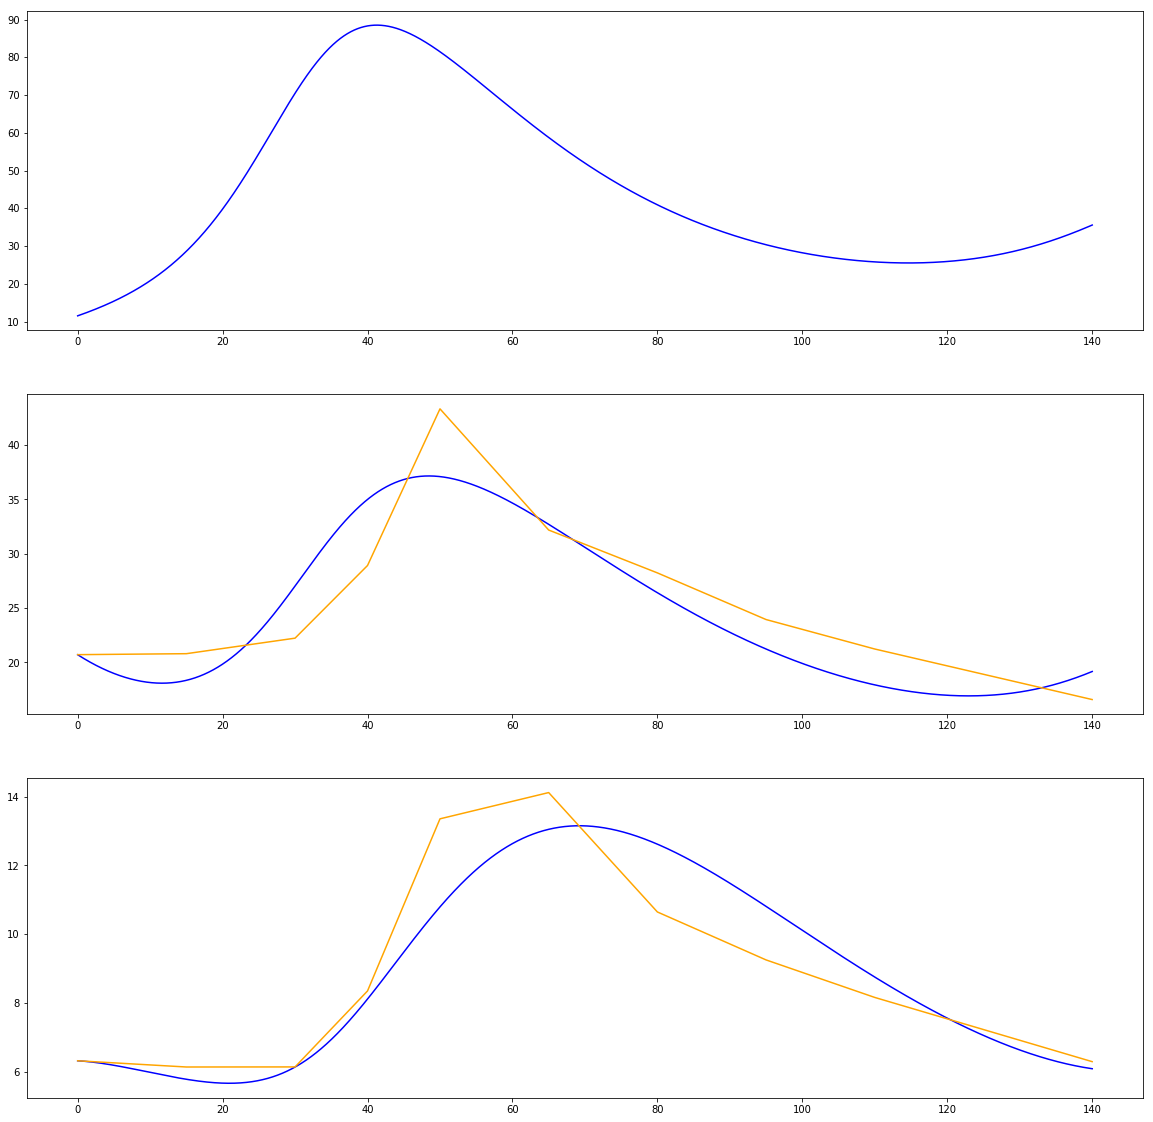

In [52]:
grapher.make_graphs()

In [ ]:
grapher.make_graphs(std_dev = True,
                    sims_line_labels=["Simulated CRH", "Simulated ACTH", "Simulated Cortisol"], 
                    graph_titles = ["CRH Concentration", "ACTH Concentration", "Cortisol Concentration"], 
                    real_data_labels = ["", "Nelson ACTH - Patient Mean", "Nelson Cortisol - Patient Mean"], 
                    xaxis_labels = ["Time (min)", "Time (min)", "Time (min)"], 
                    yaxis_labels = ["CRH (micrograms/dL)", "ACTH (pg/mL)", "Cortisol (micrograms/dL)"],
                    savefile = filename_root+'.png')


[Back to Top](#top)

# No Optimization Run <a name="no-opt"></a>

In [ ]:
y0 = [5, nelson.ACTH[0,41], nelson.cortisol[0,41]]

In [ ]:
%%time

data_no_opt = model(authors_params, y0)

In [ ]:
df_noOpt = pd.DataFrame(data_no_opt, columns=['Time',
                                              'CRH',
                                              'ACTH',
                                              'Cortisol'])

with pd.ExcelWriter("bangsgaardModel_output/no-optimization-run.xlsx") as writer:
    df_noOpt.to_excel(writer, sheet_name="No Optimization Run 1", index=False)

[Back to Top](#top)

## No Optimization Run--Iterate Over Multiple CRH Initial Conditions <a name="multipleCRH"></a>

In [ ]:
# loop through initial conditions for CRH to see how the graph changes
CRH_vals = np.arange(0, 50, 0.1)
IC_array = np.zeros((len(CRH_vals), 3))

for index, item in enumerate(CRH_vals):
    IC_array[index, 0] = item
    IC_array[index, 1] = 8.725314
    IC_array[index, 2] = 1.158798

In [ ]:
# Create an empty array to hold the concentration data from the model simulations
no_opt = np.zeros((len(CRH_vals), 144003, 4))

In [ ]:
# Iterate through the initial conditions and run the model for each set
for index, item in enumerate(IC_array):
    print("Run #", index)
    no_opt[index, :, :] = model(authors_params, item)

In [ ]:
# Create labels for the graphs that show the initial conditions used
CRH_labels = []
ACTH_labels = []
Cortisol_labels = []

for index, item in enumerate(IC_array):
    CRH_labels.append("CRH Simulation #" + str(index) + ": CRH = " + str(item[0]))
    ACTH_labels.append("ACTH Simulation #" + str(index) + ": ACTH = " + str(item[1]))                  
    Cortisol_labels.append("Cortisol Simulation #" + str(index) + ": Cortisol = " + str(item[2]))

In [ ]:
%matplotlib inline

# plot the simulations together to see how increasing initial CRH value
# changes behavior

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (15, 15))

for index, item in enumerate(no_opt):
    ax1.plot(item[:,0], item[:,1], label = CRH_labels[index])
    ax2.plot(item[:,0], item[:,2], label = ACTH_labels[index])
    ax3.plot(item[:,0], item[:,3], label = Cortisol_labels[index])

ax1.set(xlabel = "Time (min)", ylabel = "CRH (pg/mL)")
ax1.legend(loc="upper right", shadow = True, fancybox = True)

ax2.plot(patientF.ACTH[:,0], patientF.ACTH_smooth[:,1], 'm', label = "Patient F ACTH - Smoothed")
ax2.set(xlabel = "Time (min)", ylabel = "ACTH (pg/mL)")
ax2.legend(loc="upper right", shadow = True, fancybox = True)

ax3.plot(patientF.cortisol[:,0], patientF.cortisol_smooth[:,1], 'm', label = "Patient F Cortisol - Smoothed")
ax3.set(xlabel = "Time (min)", ylabel = "Cortisol (micrograms/mL)")
ax3.legend(loc="upper right", shadow = True, fancybox = True)

[Back to Top](#top)

# Run Optimizations for Multiple Patients <a name="runMultiple" />

In [ ]:
# Enter the patient number to start and end the optimization loop
start_patient = 1
end_patient = 10

for patient in range(start_patient, end_patient+1):
    print(f"\033[1mCurrent Patient: #{patient}\033[0m")
    # Change the data set to cycle through patients in here. Will only work for Nelson TSST data, including subtype
    #  data sets (as the basal data sets are only mean concentrations, not individual patients)
    data_to_match = [nelson.ACTH[:,0], nelson.ACTH[:,patient+1], nelson.cortisol[:,0], nelson.cortisol[:,patient+1]]
    y0 = [1, data_to_match[1][0], data_to_match[3][0]]
    
    opt_pars_tmp, simData_all_tmp = optimize.run(cost_fun, model, data_to_match, y0, bounds, ICopt_indices=[0], num_iter=5)
    
    if patient == start_patient:
        simData_all_multiple = simData_all_tmp
        opt_pars_multiple = opt_pars_tmp
    else:
        simData_all_multiple = np.hstack((simData_all_multiple, simData_all_tmp))
        opt_pars_multiple = np.hstack((opt_pars_multiple, opt_pars_tmp))
        

[Back to Top](#top)

# Dependencies <a name="dependencies"></a>

In [ ]:
%load_ext watermark

In [ ]:
%watermark --iversions

[Back to Top](#top)